In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

## Load dataset

In [2]:
#load dataset
df = pd.read_csv("C:/Users/sarad/OneDrive/Bureau/COURS/_MA2/DataViz/Project/Air_Traffic_Passenger_Statistics.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50730 entries, 0 to 50729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              50730 non-null  int64 
 1   Operating Airline            50730 non-null  object
 2   Operating Airline IATA Code  50427 non-null  object
 3   Published Airline            50730 non-null  object
 4   Published Airline IATA Code  50427 non-null  object
 5   GEO Summary                  50730 non-null  object
 6   GEO Region                   50730 non-null  object
 7   Activity Type Code           50730 non-null  object
 8   Price Category Code          50730 non-null  object
 9   Terminal                     50730 non-null  object
 10  Boarding Area                50730 non-null  object
 11  Passenger Count              50730 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.6+ MB


## Rename columns


In [3]:
df.rename(columns = {'Activity Period':'Activity_Period', 'Operating Airline':'Operating_Airline',"Operating Airline IATA Code":"Operating_Cod",
                     "Published Airline":"Published_Airline",
                     "Published Airline IATA Code":"Published_Airline_IATA_Code",
                     "GEO Summary":"GEO_Summary","GEO Region":"GEO_Region","Activity Type Code":"Activity_Type_Code",
                    "Price Category Code":"Price_Category_Code","Boarding Area":"Boarding_Area","Passenger Count":"Passenger_Count",
                     "Adjusted Activity Type Code":"Adjusted_Activity_Type_Code","Adjusted Passenger Count":"Adjusted_Passenger_Count"}, inplace = True)

In [5]:
df.head()

,Activity_Period,Operating_Airline,Operating_Cod,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


## Split Activity Period into two columns: Year and Month

In [4]:
df['Activity_Period'] = df['Activity_Period'].astype(str)

# Split the date column into year and month columns
df['Year'] = df['Activity_Period'].str[:4]
df['Month'] = df['Activity_Period'].str[4:]
df.drop('Activity_Period', axis=1, inplace=True)



## Domestic VS International flights

([<matplotlib.patches.Wedge at 0x14e25953e80>,
 [Text(0.49175721157246965, 0.9839587617712795, 'Domestic Flights'),
  Text(-0.4917571194475999, -0.983958807812908, 'International Flights')],
 [Text(0.26823120631225617, 0.5367047791479705, '35.2%'),
  Text(-0.26823115606232717, -0.5367048042615861, '64.8%')])

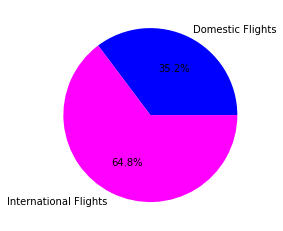

In [6]:
#plot number of domestic flights vs international flights
sizes = [df['GEO_Summary'].str.count('Domestic').sum(), df['GEO_Summary'].str.count('International').sum()]
labels = ["Domestic Flights", "International Flights"]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=["blue", "magenta"])

## Passengers per year

In [7]:
#Number of passengers per year
passengers_per_year = df.groupby('Year')['Passenger_Count'].sum()
print(passengers_per_year)

Year
2005     34444066
2006     66665940
2007     71108164
2008     74469356
2009     74677884
2010     78507998
2011     81855572
2012     88799770
2013     89891520
2014     94229262
2015    100115774
2016    106206896
2017    111647424
2018    115493746
2019    114837148
2020     32837426
2021     48669106
2022     60832332
Name: Passenger_Count, dtype: int64


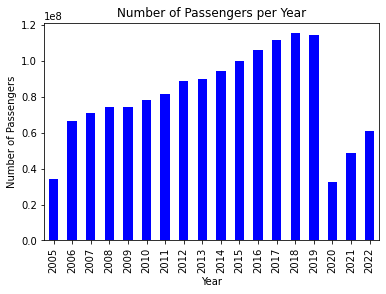

In [8]:
passengers_per_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Year')
plt.show()

## Operating airlines

In [10]:
airline_counts = df['Operating_Airline'].value_counts()
print(airline_counts)

United Airlines                     5759
United Airlines - Pre 07/01/2013    4308
SkyWest Airlines                    3371
Alaska Airlines                     2190
Delta Air Lines                     1203
                                    ... 
Trego Dugan Aviation                   4
Xtra Airways                           4
Evergreen International Airlines       4
Boeing Company                         2
Samsic Airport America, LLC            1
Name: Operating_Airline, Length: 102, dtype: int64


## Maximum number of passengers recorded

In [15]:
max_passenger_counts = df['Passenger_Count'].max()

# Print the maximum value
print("Maximum passenger count:", max_passenger_counts)

max_passenger_counts_rows = df[df['Passenger_Count'] == max_passenger_counts]

# Get the airline(s) from the row(s) with the maximum value
airlines_with_max_passenger_counts = max_passenger_counts_rows['Operating_Airline']
year_of_max_passenger_counts = max_passenger_counts_rows['Year']
month_of_max_passenger_counts = max_passenger_counts_rows['Month']

# Print the result
print("Airline(s) with maximum passenger count:", airlines_with_max_passenger_counts)
print("Year:", year_of_max_passenger_counts)
print("Month:", month_of_max_passenger_counts)

Maximum passenger count: 659837
Airline(s) with maximum passenger count: 11345    United Airlines
36298    United Airlines
Name: Operating_Airline, dtype: object
Year: 11345    2013
36298    2013
Name: Year, dtype: object
Month: 11345    08
36298    08
Name: Month, dtype: object


## Enplaned vs Deplaned vs Transit flights

Number of enplaned flights:  24266
Number of deplaned flights:  23963
Number of transit flights:  2501


([<matplotlib.patches.Wedge at 0x14e25a84cd0>,
 [Text(0.0748065761450045, 1.097453405008824, 'Enplaned'),
  Text(-0.2432072025460329, -1.072776890424907, 'Deplaned'),
  Text(1.0868328749408969, -0.16968883860674316, 'Transit')],
 [Text(0.040803586988184266, 0.5986109481866312, '47.8%'),
  Text(-0.13265847411601792, -0.5851510311408584, '47.2%'),
  Text(0.5928179317859437, -0.0925575483309508, '4.9%')])

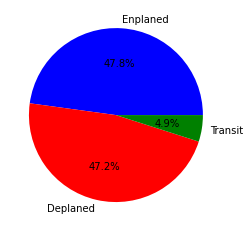

In [29]:
enplaned_flights = df['Activity_Type_Code'].str.count('Enplaned').sum()
print("Number of enplaned flights: ", enplaned_flights)
deplaned_flights = df['Activity_Type_Code'].str.count('Deplaned').sum()
print("Number of deplaned flights: ", deplaned_flights)
transit_flights = df['Activity_Type_Code'].str.count('Thru / Transit').sum()
print("Number of transit flights: ", transit_flights)
list = [enplaned_flights, deplaned_flights, transit_flights]
labels = ["Enplaned", "Deplaned", "Transit"]
fig, ax = plt.subplots()
ax.pie(list, labels=labels, autopct='%1.1f%%', colors=["blue", "red", "green"])
